<a href="https://colab.research.google.com/github/Jeeeeeeeee/Study/blob/main/TPS08_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
train_path = '/content/mydrive/MyDrive/DATA/train.csv'
test_path = '/content/mydrive/MyDrive/DATA/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.19366,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,...,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.07217,65.1543,0.022504,-5.6068,1.798660,0.528068,6696.300,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.02020,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,...,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.46258,43.1121,-0.060801,64.0455,2.358450,5.759690,3958.140,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.69954,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,...,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.22245,50.2267,-0.026215,71.6849,2.434170,1.904560,27165.800,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.80900,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,...,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.41530,116.1820,0.018674,55.4428,2.228240,4.303600,2643.760,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,1.77348,-0.546781,147.186,17.394300,0.964678,0.964894,19272478,0.121071,0.422461,-0.103100,-0.000910,8.14191,162.713,1.56561,-0.300743,7.56458,160.995,5780,-1.54254,8.09081,1.60582,7.04632,-1.056850,1.727440,126.848,0.910761,6.08868,0.150619,1.134610,...,103.9900,4.396300,0.248451,1.18082,0.546460,0.140713,0.804404,7.55191,-2.50995,68.2459,0.001230,47.2885,0.461938,1.072440,703.401,0.691108,5.014080,6.06393,1.120250,1.73348,-0.001272,-0.333872,-0.063781,1.11420,5.233990,109,-0.158318,5.43062,0.991616,0.528518,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,124999.500000,72168.927986,0.000000,62499.750000,124999.500000,187499.250000,249999.00000
f0,250000.0,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.07207
f1,250000.0,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.00000
f2,250000.0,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.76859
f3,250000.0,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.68019
...,...,...,...,...,...,...,...,...
f96,250000.0,2.417556,0.892563,-1.131980,1.906718,2.340430,2.910020,5.57604
f97,250000.0,0.537484,0.226589,0.005249,0.359646,0.531347,0.709807,1.10540
f98,250000.0,1.576900,0.646306,-0.646967,1.215810,1.451285,1.901633,4.49262
f99,250000.0,8.048805,5.647368,-0.842397,3.732800,7.182205,10.998550,34.01920


In [ ]:
target = train['loss']
train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

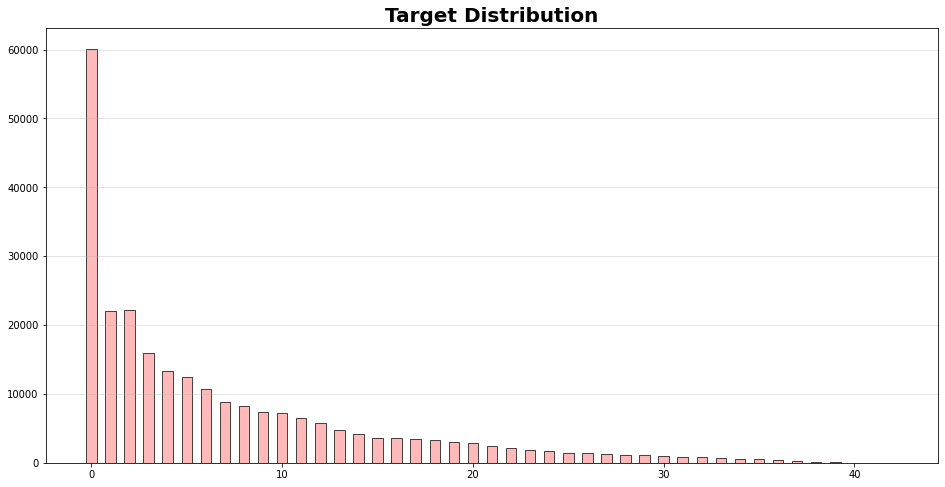

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))

target_cnt = train['loss'].value_counts().sort_index()

ax.bar(target_cnt.index, target_cnt, color = '#FFB9B9',
       width = 0.55,
       edgecolor = 'black',
       linewidth = 0.7)

ax.set_title('Target Distribution', weight = 'bold', fontsize = 20)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)

In [ ]:
target_df = pd.DataFrame(target_cnt)
target_df['ratio(%)'] = target_df/target_cnt.sum() * 100
target_df.sort_values('ratio(%)', ascending=False, inplace = True)
target_df.style.bar(subset = ['ratio(%)'], color = 'blue')

,loss,ratio(%)
0,60144,24.057600
2,22225,8.890000
1,22069,8.827600
3,15902,6.360800
4,13371,5.348400
5,12458,4.983200
6,10697,4.278800
7,8894,3.557600
8,8264,3.305600
9,7435,2.974000


# How to choose Scalers
### 1. StandardScaler : 기본 스케일, 평균과 표준편차 사용
- 이상치가 있다면 평균과 표준편차에 영향을 미쳐 데이터의 확산이 매우 달라지게 된다.
- 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 X
- 그러나 무지성으로 그냥 할 수 있는 Scaler

### 2. MinMaxScaler : 최대/최소값이 각각 1,0이 되도록 함
- 모든 feature 값이 0~1 사이에 있도록 데이터를 재조정한다.
- 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.
- 아웃라이어의 존재에 대해 민감하다.

### 3. MaxAbsScaler : 최대절대값과 0이 각각 1,0이 되도록 함
- -1~1사이로 재조정하는 Scaler
- 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작한다.
- 큰 이상치에 민감할 수 있다.

### 4. RobustScaler : 중앙값과 IQR(InterQuntile Range)사용, 아웃라이어의 영향을 최소화한다.
- StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포시키고 있다.
* IQR : Q3 - Q1 = 25퍼센타일과 75퍼센타일의 값들을 다룬다.

### 5. QuantileTransformer: 1000개 분위를 사용하여 데이터를 균등분포 (tf)
- Robust처럼 이상치에 민감하지 않고, 0~1사이로 압축
- 변환된 데이터는 평균이0, 표준편차가 1인 정규분포

### 6. PowerTransformer: 데이터의 특성별로 정규분포 형태에 가깝도록 변환한다.
- 꼭 히스토그램을 그려서 확인해보는 것이 좋다.

- reference : https://mkjjo.github.io/python/2019/01/10/scaler.html
- reference2 (Quantile Transformer) : https://tensorflow.blog/2018/01/14/quantiletransformer/

In [ ]:
# Discrete Features

discrete_features = []

for col in train.columns:
  if np.array_equal(train[col].values, train[col].values.astype(int)):
    discrete_features.append(col)


print(f'Total {len(discrete_features)} : ')
print(discrete_features)

Total 7 : 
['f1', 'f16', 'f27', 'f55', 'f60', 'f86', 'loss']


In [ ]:
for dcol in discrete_features:
  print(f'{dcol} unique value : {train[dcol].nunique()}') #nunique가 뭐지

  #### nunique() function return number of unique elements in the object

f1 unique value : 289
f16 unique value : 247476
f27 unique value : 37471
f55 unique value : 4726
f60 unique value : 212504
f86 unique value : 329
loss unique value : 43


In [ ]:
f1_loss = train.groupby(['f1'])['loss'].mean().sort_values()
print((f1_loss==0).sum()) # 이 행동을 하는 저의가 무엇일까

5


In [ ]:
# Scaling
# Except for tree-based models, you need to scale the data.
# Before Visualization, we will adjust the line and proceed with the visualization.


from sklearn.preprocessing import StandardScaler


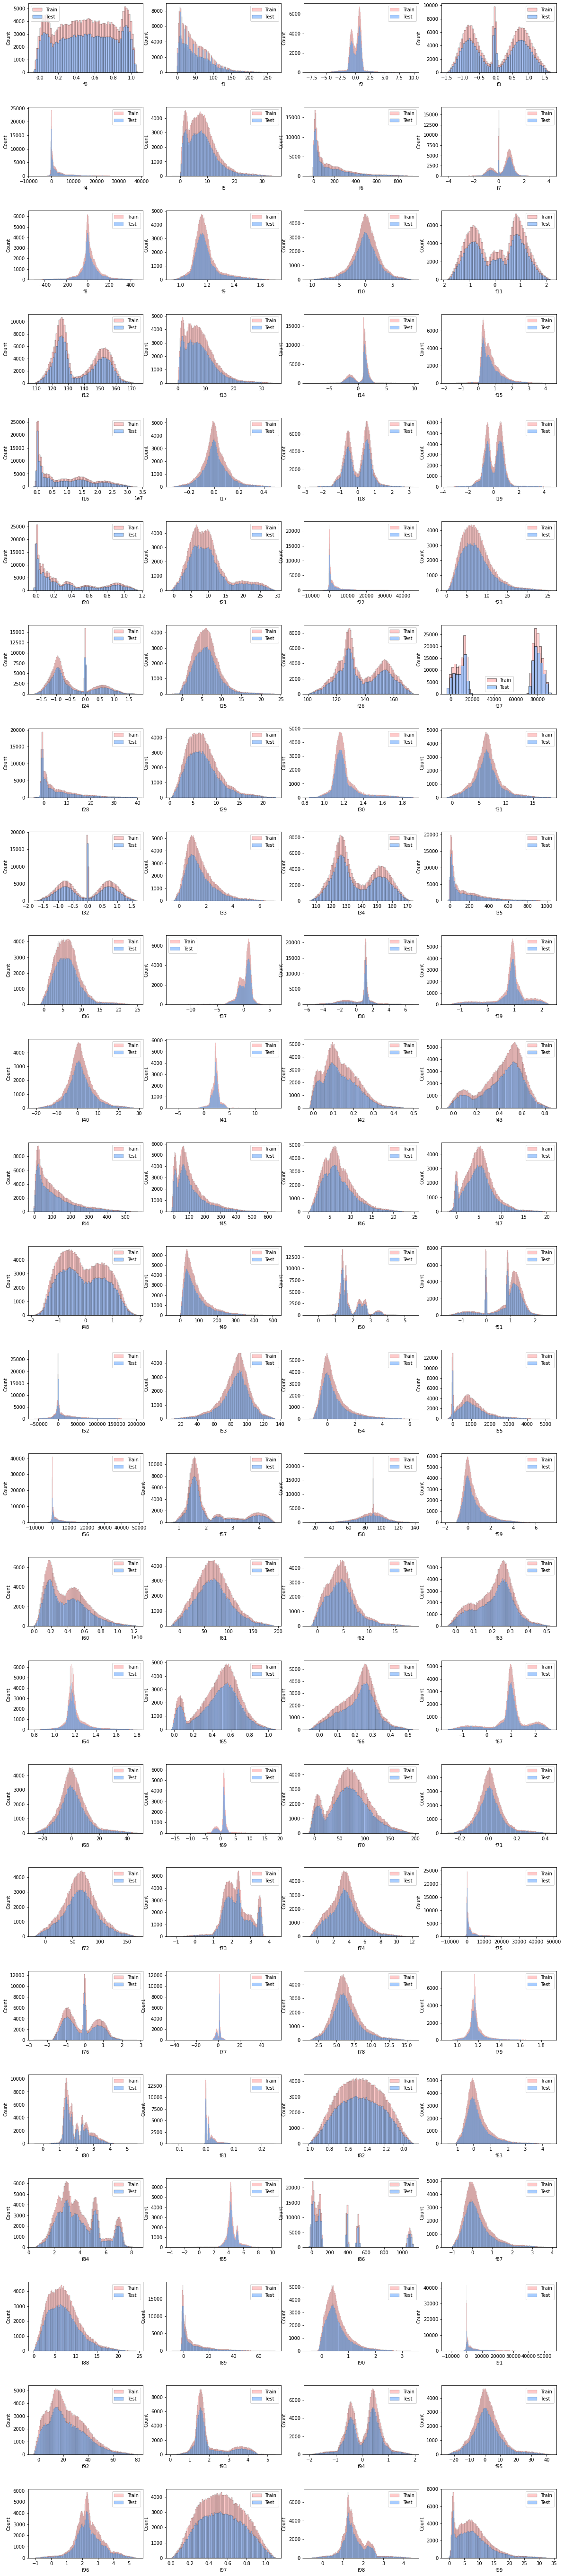

In [ ]:
# Distributions of variables

columns = train.columns[:-1]
plt.subplots(figsize = (20, 200))
length = len(columns)

for i, j in zip(columns, range(length)):
  fig = plt.subplot((length/2), 4, j+1)
  plt.subplots_adjust(wspace=.2, hspace=.5)
  sns.histplot(x = train[i], color = '#FFB9B9', edgecolor = 'black')
  sns.histplot(x = test[i], color = '#8BBDFF', edgecolor = 'black')
  fig.legend(labels = ('Train', 'Test'))

- reference : KAGGLE 안수빈님 글 : https://www.kaggle.com/subinium/tps-aug-simple-eda